In [92]:
import pandas as pd

In [93]:
import numpy as np 

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
from sklearn.model_selection import train_test_split 

In [140]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix

In [141]:
data=sns.load_dataset("iris")

In [142]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [143]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [144]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [145]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [146]:
data['species']=data["species"].astype('category')

In [147]:
data.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [148]:
data["species"]=data["species"].cat.codes


In [149]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [150]:
data.boxplot()

<Axes: >

In [151]:
data=data[data["sepal_width"]<=4]

In [152]:
data.boxplot()

<Axes: >

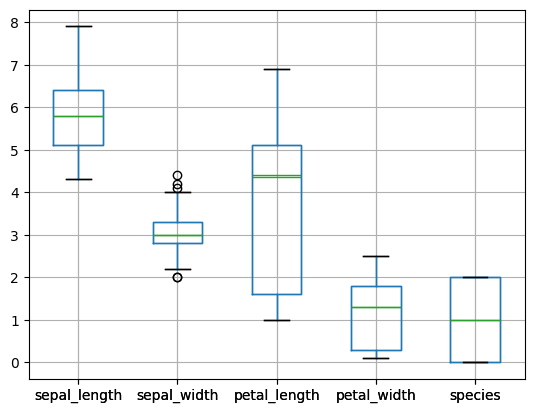

In [153]:
plt.show()

In [154]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [155]:
x=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y=data[['species']]

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [157]:
model=GaussianNB()

In [158]:
model.fit(x_train,y_train)

/home/shlok/Desktop/DSBDA Practical Assignments/env/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [159]:
y_pred=model.predict(x_train.values)

/home/shlok/Desktop/DSBDA Practical Assignments/env/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [160]:
model.score(x_train,y_train)

0.9545454545454546

In [161]:
model.score(x_test,y_test)

0.972972972972973

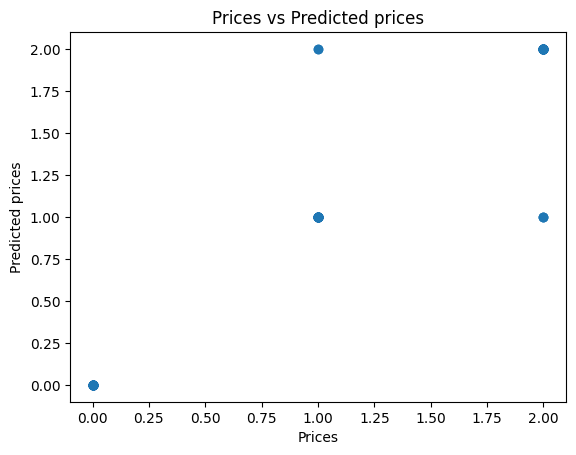

In [162]:
plt.scatter(y_train,y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [163]:
from sklearn.metrics import classification_report 

In [164]:
print("CR",classification_report(y_train,y_pred))

CR               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.92      0.95      0.93        37
           2       0.95      0.93      0.94        41

    accuracy                           0.95       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.95      0.95      0.95       110



In [169]:
print("confusion matrix",confusion_matrix(y_train,y_pred))

confusion matrix [[32  0  0]
 [ 0 35  2]
 [ 0  3 38]]
